In [1]:
%run functions.ipynb
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print(
    "(1, 0) labels count in train test: {} {}".format(
        (np.count_nonzero(y_train == 1), np.count_nonzero(y_train == 0)),
        (np.count_nonzero(y_test == 1), np.count_nonzero(y_test == 0)),
    )
)

Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


In [3]:
clf_pls = Pipeline(steps=[(DIM_REDUCTION, PLSRegressionWrapper(n_components=150)), 
                          (CLASSIFIER, LogisticRegression(penalty='l1', solver='liblinear', C=0.9448979591836735, random_state=random_state))])
clf_svm = LinearSVC(penalty='l1', dual=False, max_iter=10000, random_state=random_state, C=0.034081632653061224)
clf_rlr = RandomLogisticsRegressions(n_variables=250, n_estimators=100, C=3.4000000000000004, penalty='l1')

In [4]:
clf_pls = fit_clf_print_scores(clf_pls, X_train, y_train, X_test, y_test)

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 108
  warnings.warn('Y residual constant at iteration %s' % k)


,ROC AUC,Precision,Recall,F1
train,1.000,1.000,1.000,1.000
test,0.818,0.664,0.740,0.700


In [5]:
clf_svm = fit_clf_print_scores(clf_svm, X_train, y_train, X_test, y_test)

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,ROC AUC,Precision,Recall,F1
train,0.943,0.884,0.817,0.849
test,0.831,0.737,0.702,0.719


In [6]:
clf_rlr = fit_clf_print_scores(clf_rlr, X_train, y_train, X_test, y_test)

,ROC AUC,Precision,Recall,F1
train,0.986,0.974,0.903,0.937
test,0.816,0.722,0.625,0.670


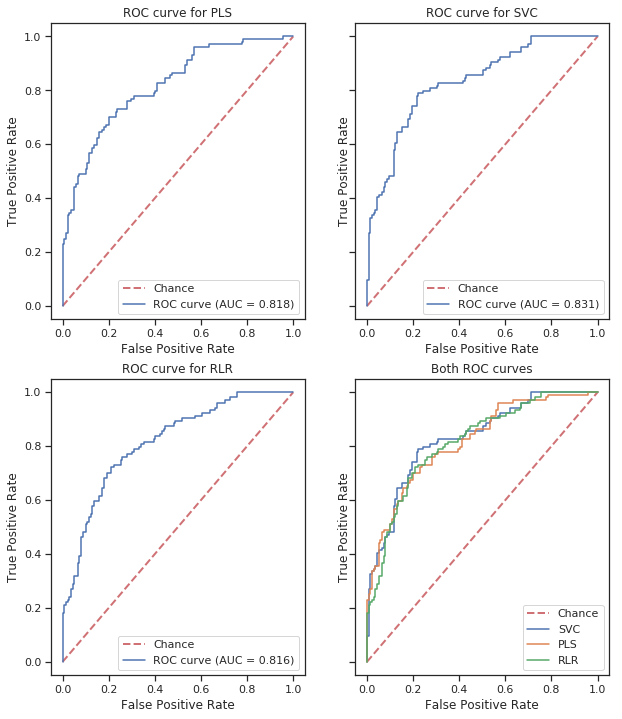

In [7]:
fig, ([ax1, ax2], [ax3, ax4]) = subplots(nrows=2, ncols=2, figsize=(10,12), sharey=True)
plot_roc_curve(ax1, clf_pls, X_test, y_test, 'ROC curve for PLS')
plot_roc_curve(ax2, clf_svm, X_test, y_test, 'ROC curve for SVC')
plot_roc_curve(ax3, clf_rlr, X_test, y_test, 'ROC curve for RLR')
fpr, tpr, roc_auc = calculate_roc_score(clf_svm, X_test, y_test)
ax4.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
ax4.plot(fpr, tpr, label="SVC")
fpr, tpr, roc_auc = calculate_roc_score(clf_pls, X_test, y_test)
ax4.plot(fpr, tpr, label="PLS")
fpr, tpr, roc_auc = calculate_roc_score(clf_rlr, X_test, y_test)
ax4.plot(fpr, tpr, label="RLR")
ax4.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="Both ROC curves"
    )
ax4.legend(loc="lower right")
show()

In [8]:
y_scores_pls = clf_pls.predict_proba(X_test)[:,1]
#y_scores_svm = clf_svm.predict_proba(X_test)[:,1]
y_scores_svm = clf_svm.decision_function(X_test)
y_scores_rlr = clf_rlr.predict_proba(X_test)[:,1]

PLS:
For threshold 0.001 recall is 0.990 and precision is 0.486
For threshold 0.008 recall is 0.952 and precision is 0.556
For threshold 0.015 recall is 0.904 and precision is 0.556
For threshold 0.061 recall is 0.856 and precision is 0.578
For threshold 0.110 recall is 0.808 and precision is 0.596
For threshold 0.499 recall is 0.750 and precision is 0.667
For threshold 0.765 recall is 0.702 and precision is 0.723
For threshold 0.992 recall is 0.500 and precision is 0.788
SVC:
For threshold -0.714 recall is 0.990 and precision is 0.510
For threshold -0.660 recall is 0.952 and precision is 0.516
For threshold -0.536 recall is 0.904 and precision is 0.556
For threshold -0.400 recall is 0.856 and precision is 0.597
For threshold -0.202 recall is 0.808 and precision is 0.689
For threshold -0.038 recall is 0.750 and precision is 0.722
For threshold 0.003 recall is 0.702 and precision is 0.737
For threshold 0.219 recall is 0.500 and precision is 0.765
RLR:
For threshold 0.117 recall is 0.990

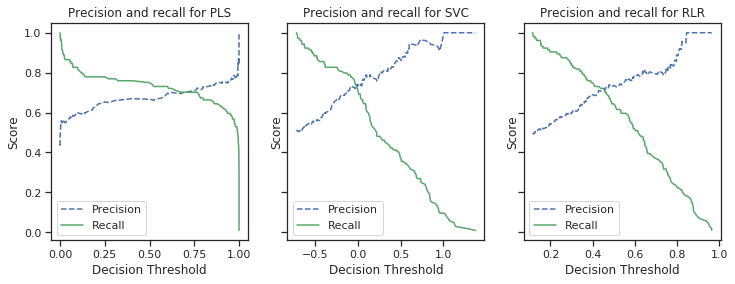

In [9]:
fig, (ax1, ax2, ax3) = subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))
plot_precision_recall_vs_threshold(ax1, y_test, y_scores_pls, 'PLS', requsted=[0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.5])
plot_precision_recall_vs_threshold(ax2, y_test, y_scores_svm, 'SVC', requsted=[0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.5])
plot_precision_recall_vs_threshold(ax3, y_test, y_scores_rlr, 'RLR', requsted=[0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.5])
show()

Accuracy and specifity for $0.95$ sensitivity

In [10]:
adjusted_classes_pls = adjusted_classes(y_scores_pls, 0.008)
print(accuracy_score(y_test, adjusted_classes_pls))
tn, fp, fn, tp = confusion_matrix(y_test, adjusted_classes_pls).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.6502057613168725
0.4316546762589928


Accuracy and specifity for $0.9$ sensitivity

In [11]:
adjusted_classes_pls = adjusted_classes(y_scores_pls, 0.015)
print(accuracy_score(y_test, adjusted_classes_pls))
tn, fp, fn, tp = confusion_matrix(y_test, adjusted_classes_pls).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.6460905349794238
0.460431654676259


Accuracy and specifity for $0.8$ sensitivity

In [12]:
adjusted_classes_pls = adjusted_classes(y_scores_pls, 0.110)
print(accuracy_score(y_test, adjusted_classes_pls))
tn, fp, fn, tp = confusion_matrix(y_test, adjusted_classes_pls).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.6790123456790124
0.5899280575539568
